[INDICIUM] Ciências de Dados

**Desafio**

Você foi alocado(a) em um time da Indicium que está trabalhando atualmente junto a um cliente no processo de criação de uma plataforma de aluguéis temporários na cidade de Nova York. Para o desenvolvimento de sua estratégia de precificação, pediu para que a Indicium fizesse uma análise exploratória dos dados de seu maior concorrente, assim como um teste de validação de um modelo preditivo.

Seu objetivo é desenvolver um modelo de previsão de preços a partir do dataset oferecido, e avaliar tal modelo utilizando as métricas de avaliação que mais fazem sentido para o problema. O uso de outras fontes de dados além do dataset é permitido (e encorajado). Você poderá encontrar em anexo um dicionário dos dados.

# Entregas

    - Faça uma análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses de negócio relacionadas. Seja criativo!
    - Responda também às seguintes perguntas:
        a. Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?
        b. O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?
        c. Existe algum padrão no texto do nome do local para lugares de mais alto valor?
    - Explique como você faria a previsão do preço a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?
    - Supondo um apartamento com as seguintes características:

{'id': 2595,

 'nome': 'Skylit Midtown Castle',

 'host_id': 2845,

 'host_name': 'Jennifer',

 'bairro_group': 'Manhattan',

 'bairro': 'Midtown',

 'latitude': 40.75362,

 'longitude': -73.98377,

 'room_type': 'Entire home/apt',

 'price': 225,

 'minimo_noites': 1,

 'numero_de_reviews': 45,

 'ultima_review': '2019-05-21',

 'reviews_por_mes': 0.38,

 'calculado_host_listings_count': 2,
 
 'disponibilidade_365': 355}

Qual seria a sua sugestão de preço?

    

# Instruções de Entrega:
- Você tem até 7 dias corridos para a entrega, contados a partir do recebimento deste desafio.
- Envie o seu relatório dentro da sua data limite para o email: selecao.lighthouse@indicium.tech
- O arquivo de entrega deve ser nomeado como: LH_CD_SEUNOME
- Salve o modelo desenvolvido no formato .pkl. 
- A entrega deve ser feita através de um repositório de código público que contenha:
    - README explicando como instalar e executar o projeto
    - Arquivo de requisitos com todos os pacotes utilizados e suas versões
    - Relatórios das análises estatísticas e EDA em PDF, Jupyter Notebook ou semelhante conforme passo 1 e 2.
    - Códigos de modelagem utilizados no passo 3 (pode ser entregue no mesmo Jupyter Notebook).
    - Arquivo .pkl conforme passo 5 acima.
- Todos os códigos produzidos devem seguir as boas práticas de codificação.

# Dicionário dos dados
## A base de dados de treinamento contém 16 colunas. Seus nomes são auto-explicativos, mas, caso haja alguma dúvida, a descrição das colunas é:

- id – Atua como uma chave exclusiva para cada anúncio nos dados do aplicativo
- nome - Representa o nome do anúncio
- host_id - Representa o id do usuário que hospedou o anúncio
- host_name – Contém o nome do usuário que hospedou o anúncio
- bairro_group - Contém o nome do bairro onde o anúncio está localizado
- bairro - Contém o nome da área onde o anúncio está localizado
- latitude - Contém a latitude do local
- longitude - Contém a longitude do local
- room_type – Contém o tipo de espaço de cada anúncio
- price - Contém o preço por noite em dólares listado pelo anfitrião
- minimo_noites - Contém o número mínimo de noites que o usuário deve reservar
- numero_de_reviews - Contém o número de comentários dados a cada listagem
- ultima_review - Contém a data da última revisão dada à listagem
- reviews_por_mes - Contém o número de avaliações fornecidas por mês
- calculado_host_listings_count - Contém a quantidade de listagem por host
- disponibilidade_365 - Contém o número de dias em que o anúncio está disponível para reserva

# Etapas:

## - [X] Visualizar os dados
## - [ ]Manipular e preparar os dados
## - [ ]Análise exploratória (EDA)
## - [ ]Decidir modelos de machine learning
## - [ ]Testes, Resultados e Hipóteses
## - [ ]Entregar demandas do desafio

In [43]:
# Dependências
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
import missingno as msno

# Visualizar Dados
- Análise geral das features
- Distingguir formato das features (int, float, char)
- Identificar anomalias, dados ausentes e erros

In [44]:
indicium = pd.read_csv('C:/Users/ianpv/OneDrive/Light_house/teste_indicium_precificacao.csv')
indicium.describe()


,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Notamos que as features price,minimo_noites,numero_de_reviews,reviews_por_mes, calculado_host_listings_count e disponibilidade_365 apresentam alguns valores máximos e mínimos muito discrepantes com a média o que pode indicar anomalias, examinaremos e possivelmente trataremos esses outliers.

In [45]:
# Análise Geral
indicium.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [46]:
indicium.sample(20)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
11984,9334365,1bd steps from Central Park/museum,20592462,Julia,Manhattan,Upper East Side,40.77751,-73.95560,Entire home/apt,125,1,1,2015-11-23,0.02,1,0
26175,20874372,2 Bedroom/2 Bath Spacious Loft in Clinton Hill,3905466,Stefanie,Brooklyn,Clinton Hill,40.68657,-73.96003,Entire home/apt,250,3,3,2018-10-08,0.16,1,0
17136,13577416,Comfy Loft Bed in Sunny Room with plants,23505542,Sarah,Brooklyn,Sunset Park,40.65562,-74.00295,Private room,40,2,3,2016-10-19,0.08,1,0
30892,23921983,Private Studio in charming Tudor style home.,165257273,Soon,Queens,Flushing,40.77193,-73.79966,Private room,50,30,5,2019-06-06,0.40,3,296
38010,30038208,LUX TOP LOC OWN ENTRY GUEST SUITE 1BR+SPABATH+LV!,225706084,Mikki & Doni,Brooklyn,Prospect-Lefferts Gardens,40.65786,-73.95813,Entire home/apt,135,2,29,2019-06-29,4.01,1,80
1239,530576,"1bedroom, 70s UWS,brownstone charm",263510,Sandy,Manhattan,Upper West Side,40.78111,-73.97739,Private room,93,14,88,2019-06-28,1.03,1,176
25795,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
11915,9279920,Charming Gramercy Studio Furnished,48190744,Samantha,Manhattan,Gramercy,40.73438,-73.98615,Entire home/apt,145,21,0,NaN,NaN,1,0
8187,6314794,Bright Room at the Hudson!,3944633,Siobhan,Manhattan,Harlem,40.82782,-73.95155,Private room,79,1,0,NaN,NaN,1,0
5852,4271119,Private bedroom in Hell's Kitchen,15638520,Joseph & Hector,Manhattan,Upper West Side,40.76845,-73.98320,Private room,112,3,126,2019-07-01,2.92,1,230


In [56]:
# Segregação de Dados por Tipo de Dados

colunas_por_dtype = indicium.columns.to_series().groupby(indicium.dtypes).groups

for dtype, colunas in colunas_por_dtype.items():
    print(f"Tipo de Dados: {dtype}")
    print(", ".join(colunas))
    print("\n")

Tipo de Dados: int64
id, host_id, price, minimo_noites, numero_de_reviews, calculado_host_listings_count, disponibilidade_365


Tipo de Dados: float64
latitude, longitude, reviews_por_mes


Tipo de Dados: object
nome, host_name, bairro_group, bairro, room_type, ultima_review




 Observado a presença de 16 features de 3 tipos variados (int,float, e object) totalizando 48.894 linhas as features nome, host_name, ultima_review e reviews_por_mes apresentam valores nulos.
- Usar funções para contabilizar a quantidade de valores ausentes em cada features.

In [48]:
indicium.isnull().sum()

# ultima_review e reviews_por_mes tem muitos valores nulos, vamos calcular a porcentagem de valores nulos para decidir o que fazer com eles

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

In [57]:
# Máscara booleana para valores nulos
ultimo_review_nulos = indicium['ultima_review'].isnull().sum()
reviews_por_mes_nulos = indicium['reviews_por_mes'].isnull().sum()

# Calculando a porcentagem de valores nulos
ultimo_review_nulos_percent = (ultimo_review_nulos/len(indicium['ultima_review']))*100
reviews_por_mes_nulos_percent = (reviews_por_mes_nulos/len(indicium['reviews_por_mes']))*100

# Imprimindo os resultados
print('Porcentagem de valores nulos em ultima_review: {:.2f}%'.format(ultimo_review_nulos_percent))
print('Porcentagem de valores nulos em reviews_por_mes: {:.2f}%'.format(reviews_por_mes_nulos_percent))

Porcentagem de valores nulos em ultima_review: 20.56%
Porcentagem de valores nulos em reviews_por_mes: 20.56%


Notamos uma porcentagem alta de dados ausentes para as duas features de reviews, porém não é uma uma quantidade alta suficiente para dropar as colunas. Por se tratar de avaliações do imóvel de hospedagem deve ser analisado com cautela.
Iremos investigar se Há correlações entre as ausências de dados usando um matrix.
Por se tratar de duas features envolvidas com reviews e apresentarem a mesma quantidade de valores ausentes e provável que haja uma forte correlação.

<Axes: >

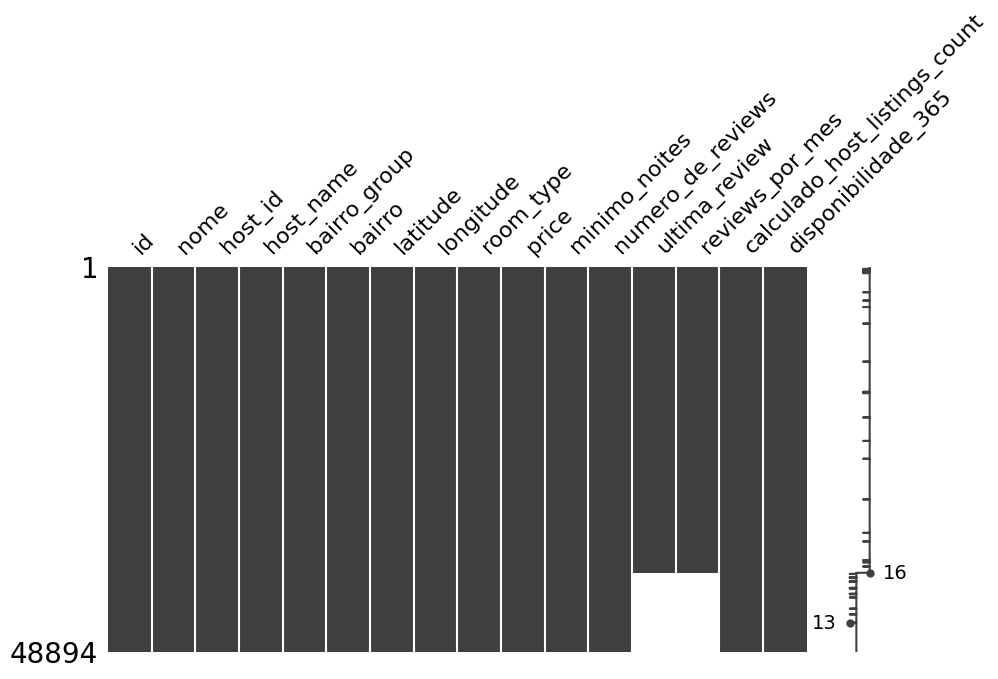

In [58]:
matrix = indicium.sort_values('reviews_por_mes')
msno.matrix(matrix, figsize=(10, 5))

#O número total de reviews não apresenta nenhum valor ausente e correlação com os outros valores ausentes.
# Vamos criar um dataset com as três features que envolvem reviews para uma melhor análise.

# COMO PLOTAR OS VALORES IGUAIS A ZERO? DA FEATURE NUMERO_DE_REVIEWS ??

In [59]:
indicium_reviews = indicium[['ultima_review', 'reviews_por_mes', 'numero_de_reviews']]
# vamos imprimir apenas as linhas que possuem valores nulos das features ultima_review e reviews_por_mes
indicium_reviews[indicium_reviews.isnull().any(axis=1)]
#vamos confirmar se todos os valores 0 de numero_de_reviews possuem valores nulos em ultima_review e reviews_por_mes
indicium_reviews[indicium_reviews['numero_de_reviews'] == 0].isnull().sum()

ultima_review        10052
reviews_por_mes      10052
numero_de_reviews        0
dtype: int64

In [60]:
# Calculando a quantidade de valores iguais a zero na disponibilidade_365

dispobibilidade_zeros = (indicium['disponibilidade_365'] == 0).sum()
print('Número de valores 0 em disponibilidade_365: {}'.format(dispobibilidade_zeros))

Número de valores 0 em disponibilidade_365: 17533


In [61]:
# Vamos calcular a média, mediana e moda de ultima_review, reviews_por_mes, numero_de_reviews e Disponibilidade_365
media_ultima_review = indicium['reviews_por_mes'].mean()
mediana_ultima_review = indicium['reviews_por_mes'].median()
moda_ultima_review = indicium['reviews_por_mes'].mode()
print('Média de reviews_por_mes: {:.2f}'.format(media_ultima_review))
print('Mediana de reviews_por_mes: {:.2f}'.format(mediana_ultima_review))
print('Moda de reviews_por_mes: {:.2f}'.format(moda_ultima_review[0]))
print('\n')
media_numero_de_reviews = indicium['numero_de_reviews'].mean()
mediana_numero_de_reviews = indicium['numero_de_reviews'].median()
moda_numero_de_reviews = indicium['numero_de_reviews'].mode()
print('Média de numero_de_reviews: {:.2f}'.format(media_numero_de_reviews))
print('Mediana de numero_de_reviews: {:.2f}'.format(mediana_numero_de_reviews))
print('Moda de numero_de_reviews: {:.2f}'.format(moda_numero_de_reviews[0]))

media_disponibilidade_365 = indicium['disponibilidade_365'].mean()
mediana_disponibilidade_365 = indicium['disponibilidade_365'].median()
moda_disponibilidade_365 = indicium['disponibilidade_365'].mode()
print('\n')
print('Média de disponibilidade_dias_365: {:.2f}'.format(media_disponibilidade_365))
print('Mediana de disponibilidade_dias_365: {:.2f}'.format(mediana_disponibilidade_365))
print('Moda de disponibilidade_dias_365: {:.2f}'.format(moda_disponibilidade_365[0]))




Média de reviews_por_mes: 1.37
Mediana de reviews_por_mes: 0.72
Moda de reviews_por_mes: 0.02


Média de numero_de_reviews: 23.27
Mediana de numero_de_reviews: 5.00
Moda de numero_de_reviews: 0.00


Média de disponibilidade_dias_365: 112.78
Mediana de disponibilidade_dias_365: 45.00
Moda de disponibilidade_dias_365: 0.00


# Manipulando e Preparando os dados
- Imputando valores ausentes e nulos
- Diagnosticar e tratar Outliers
- Transformação de dados
- Tidy Data

### Vamos fazer imputação simples de dados categoricos com a moda.
### Vamos abordar as técnicas de imputação de dados mais avançadas:
- Multiple Imputation by Chained Equations (MICE)
- Utilizar aprendizagem de máquina para escolha do valor adequado
-  KNN (Média dos k vizinhos mais próximos)  usando KNNImputer
- InterativeImputer (regressão múltipla)



In [68]:
# Inputar valores nulos da feature ultima_review que é categórica com a moda

indicium_categorical_input = indicium.copy(deep=True)

modal_ultima_review = indicium_categorical_input['ultima_review'].mode()[0]
indicium_categorical_input['ultima_review']= indicium_categorical_input['ultima_review'].fillna(modal_ultima_review)

# A inputação da mediana para número de reviews é uma boa escolha, pois a mediana é menos sensível a outliers


# Calcular a moda da feature de dias disponíveis para locação
mediana_dias_disponiveis = indicium_categorical_input['disponibilidade_365'].median()



# inputar a moda nos valores igual a zero
indicium_categorical_input['disponibilidade_365'] = indicium_categorical_input['disponibilidade_365'].replace(0, mediana_dias_disponiveis)

print(indicium_categorical_input['disponibilidade_365'])

0        355
1        365
2        194
3         45
4        129
        ... 
48889      9
48890     36
48891     27
48892      2
48893     23
Name: disponibilidade_365, Length: 48894, dtype: int64


In [65]:
print('Mediana de disponibilidade_dias_365: {:.2f}'.format(mediana_dias_disponiveis))

Mediana de disponibilidade_dias_365: 45.00


In [69]:
# Contar a quantidade de valores 0 em 'disponibilidade_365' e 'ultima_review'
qtd_zeros_ultima_review = (indicium_categorical_input['ultima_review'] == 0).sum()

qtd_zeros_disponibilidade_365 = (indicium_categorical_input['disponibilidade_365'] == 0).sum()

# Porém não está inputando corretamente, continuamos com 17.533 valores igual a zero.
print("Quantidade de valores 0 em 'ultima_review':", qtd_zeros_ultima_review)
print("Quantidade de valores 0 em 'disponibilidade_365':", qtd_zeros_disponibilidade_365)

Quantidade de valores 0 em 'ultima_review': 0
Quantidade de valores 0 em 'disponibilidade_365': 0


In [70]:
indicium_categorical_input.isnull().sum()

indicium_categorical_input.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,45
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [71]:
from sklearn.impute import KNNImputer
import time

In [72]:
# Imputando os valores nulos com KNN
# Criando uma cópia profunda do dataset
indicium_knn_imputer = indicium_categorical_input.copy()

# Verificar qual a métrica de distância mais adequada para o problema
knn_imputer = KNNImputer(n_neighbors=2, weights='uniform', metric='nan_euclidean')
start_time_knn = time.time()
indicium_knn_imputer['numero_de_reviews'] = knn_imputer.fit_transform(indicium_knn_imputer[['numero_de_reviews']])
indicium_knn_imputer['reviews_por_mes'] = knn_imputer.fit_transform(indicium_knn_imputer[['reviews_por_mes']])
end_time_knn = time.time()
print('Tempo de execução do KNN Imputer: {:.4f} segundos'.format(end_time_knn - start_time_knn))

KeyboardInterrupt: 

In [35]:
# Verificando se ainda existem valores nulos
indicium_knn_imputer.isnull().sum()

id                                0
nome                             16
host_id                           0
host_name                        21
bairro_group                      0
bairro                            0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimo_noites                     0
numero_de_reviews                 0
ultima_review                     0
reviews_por_mes                   0
calculado_host_listings_count     0
disponibilidade_365               0
dtype: int64

In [75]:
# Imputando os valores nulos com InterativeImputer
# Imputação com uma performance melhor que o KNN
#deixar nota explicando
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

indicium_iterative_imputer = indicium_categorical_input.copy(deep=True)
# Pesquisar a melhor quantidade de iterações
mice_imputer = IterativeImputer(max_iter=10, random_state=0)
start_time_interative = time.time()
indicium_iterative_imputer['numero_de_reviews'] = mice_imputer.fit_transform(indicium_iterative_imputer[['numero_de_reviews']])
indicium_iterative_imputer['reviews_por_mes'] = mice_imputer.fit_transform(indicium_iterative_imputer[['reviews_por_mes']])
end_time_interative = time.time()

elapsed_time = end_time_interative - start_time_interative
print('Tempo de execução: {:.2f} segundos'.format(elapsed_time))

Tempo de execução: 0.01 segundos


In [76]:
# Verificando se ainda existem valores nulos
indicium_iterative_imputer.isnull().sum()

id                                0
nome                             16
host_id                           0
host_name                        21
bairro_group                      0
bairro                            0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimo_noites                     0
numero_de_reviews                 0
ultima_review                     0
reviews_por_mes                   0
calculado_host_listings_count     0
disponibilidade_365               0
dtype: int64

### Possíveis abordagens para tratar Outliers:
- Regra empírica (para distribuição normal)
- IQR
- z-score

In [77]:
#Dependências necessárias

from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from scipy import stats

In [78]:
#Criar um novo dataset com as features de Dtype int64 e float64 (exceto id, host_id, latitude,longitude) para fazer um histograma

indicium_int_float = indicium_iterative_imputer.select_dtypes(include=['int64', 'float64']).drop(['latitude', 'longitude','id', 'host_id'], axis=1)



In [79]:
#Função para implementar a regra empírica de 68-95-99.7

def drop_outliers(df, z_thresh=3):
    df2 = df.copy()
    m = df2[field_name].mean()
    sd = df2[field_name].std() 
    upper = m + k*sd
    lower = m - k*sd
    i_up = df2[df2[field_name] > upper].index
    i_lo = df2[df2[field_name] < lower].index
    df2.drop(i_up, axis=0, inplace=True)
    df2.drop(i_lo, axis=0, inplace=True)
    return df2

In [80]:
def drop_outliers_std_v2(df, field_name, k=3):
    mean, std = df[field_name].mean(), df[field_name].std()
    lower, upper = mean - k*std, mean + k*std
    return df.query(f'{lower} <= {field_name} <= {upper}').copy()


In [81]:
def drop_outliers_3std(df, field_name):
  df2 = df.copy()
  m = df2[field_name].mean()
  sd = df2[field_name].std() 
  upper = m + 3*sd
  lower = m - 3*sd
  i_up = df2[df2[field_name] > upper].index
  i_lo = df2[df2[field_name] < lower].index
  df2.drop(i_up, axis=0, inplace=True)
  df2.drop(i_lo, axis=0, inplace=True)
  return df2

In [82]:
indicium_df1 = drop_outliers_3std(indicium_int_float,'price')
indicium_df1v2 = drop_outliers_std_v2(indicium_int_float,'price')

C:\Users\ianpv\AppData\Local\Temp\ipykernel_18276\1072430555.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=indicium_int_float,y='price',palette="muted",ax=axes[0])


C:\Users\ianpv\AppData\Local\Temp\ipykernel_18276\1072430555.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=indicium_df1,y='price',palette="muted",ax=axes[1])


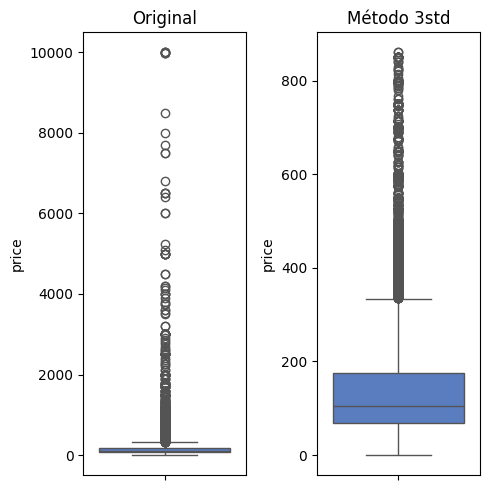

In [83]:
fig, axes = plt.subplots(ncols=2, figsize=(5,5))
sns.boxplot(data=indicium_int_float,y='price',palette="muted",ax=axes[0])
axes[0].set_title("Original")
sns.boxplot(data=indicium_df1,y='price',palette="muted",ax=axes[1])
axes[1].set_title("Método 3std")
plt.tight_layout()
plt.show()

In [84]:
ind_df1 = drop_outliers_3std(indicium_int_float,'numero_de_reviews')

In [85]:
def drop_outliers_z(df,col,k=3):
  z_values = np.abs(stats.zscore(df[col]))
  return df[z_values < k]

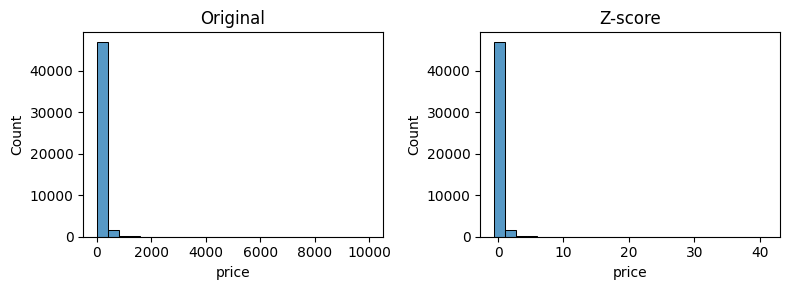

In [86]:
fig, axes = plt.subplots(ncols=2,figsize=(8,3))
sns.histplot(indicium_int_float['price'],bins=25,ax=axes[0])
axes[0].set(title="Original")
sns.histplot(stats.zscore(indicium_int_float['price']),bins=25,ax=axes[1])
axes[1].set(title="Z-score")
plt.tight_layout()

In [87]:
ind_z=np.abs(stats.zscore(indicium_int_float['price']))

In [88]:
ind_df3 = indicium_int_float[ind_z<3]

In [89]:
ind_df4 = drop_outliers_z(indicium_int_float,'price')

<Axes: xlabel='price', ylabel='Count'>

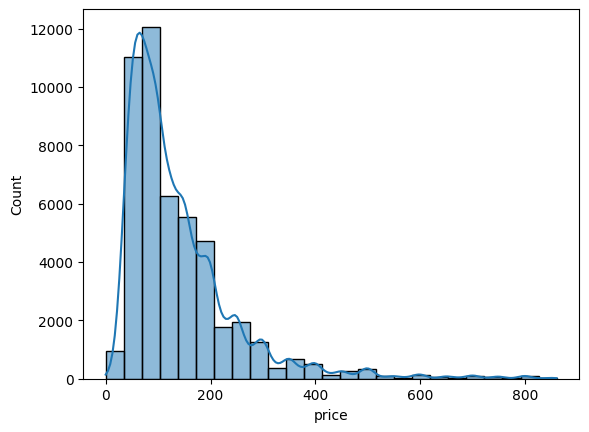

In [90]:
sns.histplot(ind_df3['price'],bins=25,kde=True)

<Axes: xlabel='price', ylabel='Count'>

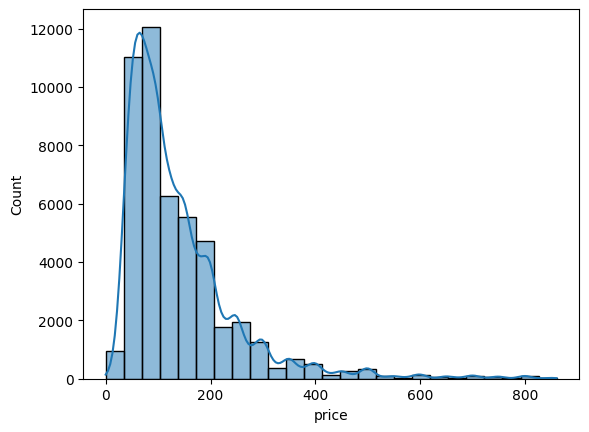

In [91]:
sns.histplot(ind_df4['price'],bins=25,kde=True)

Text(0.5, 1.0, 'Original')

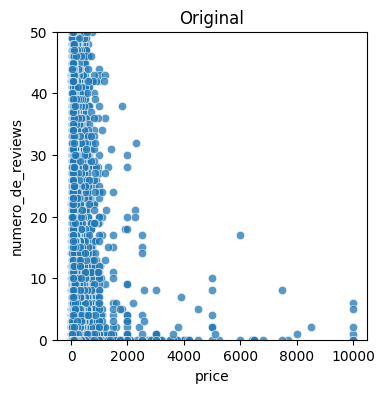

In [92]:
plt.subplots(figsize=(4,4))
sns.scatterplot(data=indicium_int_float,x='price',y='numero_de_reviews',alpha=0.75)
plt.ylim(0,50)
plt.title("Original")

Text(0.5, 1.0, 'z-score')

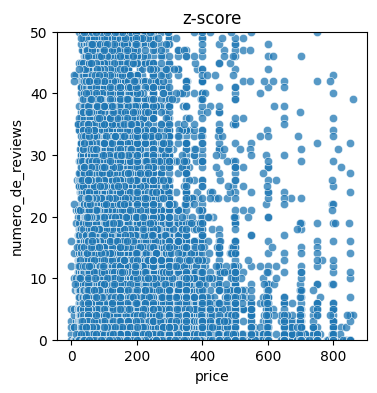

In [93]:
plt.subplots(figsize=(4,4))
sns.scatterplot(data=ind_df4,x='price',y='numero_de_reviews',alpha=0.75)
plt.ylim(0,50)
plt.title("z-score")

# EDA

### Objetivos:
- Definir os atributos mais adequados.
- Encontrar padrões
- Validar resultados.
- Refinar Features que serão utilizados para ML

### Meios:
- EDA para garantir os melhores resultados para o projeto.


### Finalização:
- Resumo de dados através de estatísticas descritivas

**Métodos**
- Análise univariada - fornece estatísticas resumidas para cada atributo dos dados brutos
- Análise bivariada - busca relação entre cada atributo nos dados e a variável alvo
- Análise multivariada - busca por interações entre diferentes atributos nos dados
- Redução da dimensionalidade - ajuda a identificar os atributos mais relevante dos dados e permite o processamento de um volume reduzido de dados.